Tabel 15 Contoh Data Berdasarkan Grade:


,filename,length_norm,diameter_norm,weight_norm,ratio_norm,fuzzy_score,final_grade
0,A_01.jpg,0.995670,0.838336,0.779915,0.589461,90.039295,A
1,A_02.jpg,0.877465,0.958091,0.867662,0.052397,40.592440,A
2,A_03.jpg,1.000000,0.974577,0.965919,0.261515,54.563206,A
3,A_04.jpg,0.982489,1.000000,1.000000,0.080888,43.403740,A
4,A_05.jpg,0.948410,1.000000,1.000000,0.018319,42.099185,A
5,A_26.jpg,0.694102,0.689135,0.481043,0.303060,45.847033,B
6,A_54.jpg,0.680813,0.687372,0.474130,0.275007,43.585926,B
7,A_55.jpg,0.661951,0.743154,0.517392,0.079927,29.429068,B
8,A_56.jpg,0.587256,0.706554,0.453200,0.000000,33.018487,B
9,A_57.jpg,0.603331,0.615934,0.384945,0.284847,42.221817,B


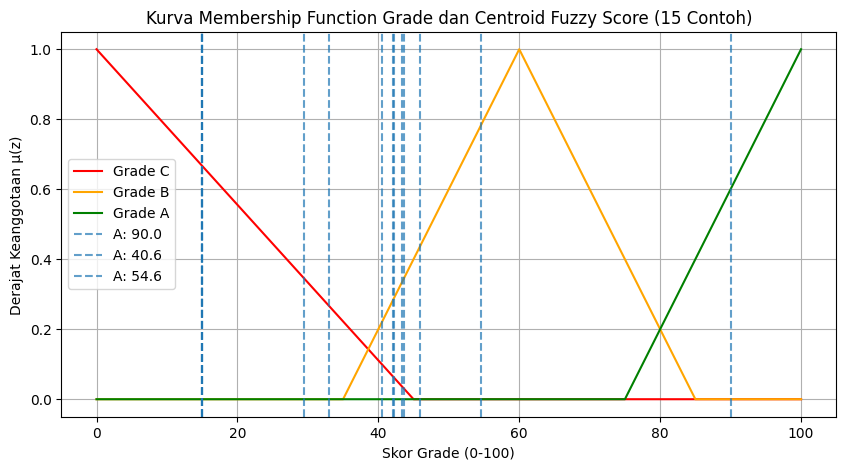

In [2]:
# DragonEye_Fuzzy_Examples.ipynb

# ============================
# 1️⃣ IMPORT LIBRARY
# ============================
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# ============================
# 2️⃣ LOAD DATASET
# ============================
dataset_path = r"E:\DragonEye\dataset\graded_features.csv"
df = pd.read_csv(dataset_path)
df.columns = df.columns.str.strip()  # Bersihkan spasi kolom

# ============================
# 3️⃣ PILIH 5 DATA CONTOH TIAP GRADE
# ============================
# Jika ingin berdasarkan prefix filename, gunakan:
# contoh_A = df[df['filename'].str.startswith('A_')].head(5)
# contoh_B = df[df['filename'].str.startswith('B_')].head(5)
# contoh_C = df[df['filename'].str.startswith('C_')].head(5)

# Alternatif: berdasarkan final_grade
contoh_A = df[df['final_grade'] == 'A'].head(5)
contoh_B = df[df['final_grade'] == 'B'].head(5)
contoh_C = df[df['final_grade'] == 'C'].head(5)

# Gabungkan semua contoh
df_examples = pd.concat([contoh_A, contoh_B, contoh_C]).reset_index(drop=True)

# ============================
# 4️⃣ TAMPILKAN TABEL DATA CONTOH
# ============================
columns_to_show = ['filename','length_norm','diameter_norm','weight_norm','ratio_norm','fuzzy_score','final_grade']
print("Tabel 15 Contoh Data Berdasarkan Grade:")
display(df_examples[columns_to_show])

# ============================
# 5️⃣ DEFINISI MEMBERSHIP FUNCTION GRADE
# ============================
grade = ctrl.Consequent(np.linspace(0,100,101), 'grade')
grade['C'] = fuzz.trimf(grade.universe, [0,0,45])
grade['B'] = fuzz.trimf(grade.universe, [35,60,85])
grade['A'] = fuzz.trimf(grade.universe, [75,100,100])

# ============================
# 6️⃣ PLOT MEMBERSHIP FUNCTION DENGAN CENTROID
# ============================
plt.figure(figsize=(10,5))
plt.plot(grade.universe, grade['C'].mf, 'r', linewidth=1.5, label='Grade C')
plt.plot(grade.universe, grade['B'].mf, 'orange', linewidth=1.5, label='Grade B')
plt.plot(grade.universe, grade['A'].mf, 'g', linewidth=1.5, label='Grade A')

# Tampilkan centroid (fuzzy_score) tiap contoh
for i, row in df_examples.iterrows():
    plt.axvline(row['fuzzy_score'], linestyle='--', alpha=0.7,
                label=f"{row['final_grade']}: {row['fuzzy_score']:.1f}" if i<3 else "")  # label hanya untuk 3 pertama agar legenda tidak terlalu penuh

plt.title("Kurva Membership Function Grade dan Centroid Fuzzy Score (15 Contoh)")
plt.xlabel("Skor Grade (0-100)")
plt.ylabel("Derajat Keanggotaan μ(z)")
plt.legend()
plt.grid(True)
plt.show()
